In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:36<00:00, 24.5MB/s]
100% 812M/812M [00:36<00:00, 23.1MB/s]


In [3]:

import zipfile
zip_ref=zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip_ref.extractall("/content")
zip_ref.close()

In [4]:

zip_ref=zipfile.ZipFile("/content/train.zip","r")
zip_ref.extractall("/content")
zip_ref.close()

In [5]:

zip_ref=zipfile.ZipFile("/content/test1.zip","r")
zip_ref.extractall("/content")
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten


In [7]:
!mkdir /content/train/dogs
!mkdir /content/train/cats
!mv /content/train/*dog* /content/train/dogs
!mv /content/train/*cat* /content/train/cats

mv: cannot move '/content/train/dogs' to a subdirectory of itself, '/content/train/dogs/dogs'
mv: cannot move '/content/train/cats' to a subdirectory of itself, '/content/train/cats/cats'


In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)



Found 25000 files belonging to 2 classes.


In [9]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)

In [10]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [11]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [12]:
history=model.fit(train_ds,epochs=2)

Epoch 1/2
782/782 [==============================] - 64s 71ms/step - loss: 0.7019 - accuracy: 0.5125
Epoch 2/2
782/782 [==============================] - 57s 72ms/step - loss: 0.6665 - accuracy: 0.6048


In [13]:
import cv2
import matplotlib.pyplot as plt

test_img_path = "/content/test1/1.jpg"
test_img = cv2.imread(test_img_path)

if test_img is None:
    print(f"Error: Could not read image from {test_img_path}. Check if the path is correct and the image file is valid.")
else:
    test_img = cv2.resize(test_img, (256, 256))
    test_input = test_img.reshape((1, 256, 256, 3))

1/1 [==============================] - 0s 18ms/step
It's a cat.


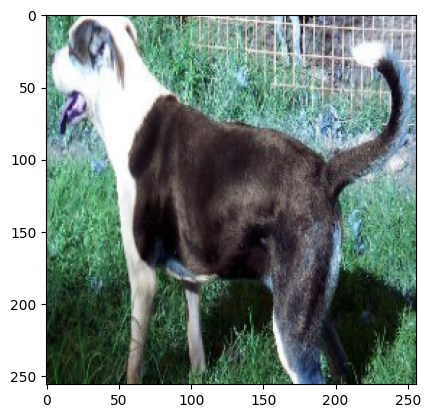

In [18]:
plt.imshow(test_img)
svm_predict= model.predict(test_input)

if svm_predict == 1:
        print("It's a dog.")
else:
        print("It's a cat.")

In [19]:
test_img=cv2.imread("/content/test1/10003.jpg")
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))

1/1 [==============================] - 0s 31ms/step
It's a cat.


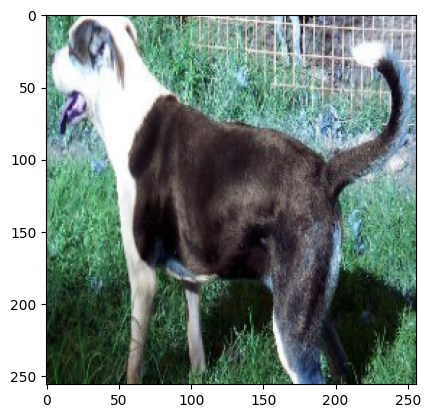

In [20]:
plt.imshow(test_img)
svm_predict= model.predict(test_input)

if svm_predict == 1:
        print("It's a dog.")
else:
        print("It's a cat.")